In [1]:
import pandas as pd
import numpy as np
import operator
df = pd.read_csv("1429_1.csv")

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16520\1828642845.py:4: DtypeWarning: Columns (1,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("1429_1.csv")


In [2]:
review_df = df[['reviews_text','reviews_rating']]
print(review_df.shape)
review_df.head(5)

(34660, 2)


,reviews_text,reviews_rating
0,This product so far has not disappointed. My c...,positive
1,great for beginner or experienced person. Boug...,positive
2,Inexpensive tablet for him to use and learn on...,positive
3,I've had my Fire HD 8 two weeks now and I love...,positive
4,I bought this for my grand daughter when she c...,positive


In [6]:
sentiment_label = review_df.reviews_rating.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [7]:

tweet=review_df.reviews_text.values.astype(str)
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

14433

In [8]:
encoded_docs = tokenizer.texts_to_sequences(tweet)
encoded_docs

[[9,
  44,
  26,
  160,
  40,
  29,
  567,
  10,
  327,
  22,
  3,
  18,
  5,
  2,
  4,
  41,
  1,
  417,
  3,
  1544,
  219,
  81,
  316,
  59,
  264,
  13,
  432],
 [11, 6, 824, 52, 1991, 590, 33, 24, 7, 93, 2, 38, 66, 5],
 [490,
  14,
  6,
  321,
  3,
  18,
  2,
  449,
  15,
  1007,
  45,
  65,
  1,
  2177,
  95,
  23,
  1160,
  13,
  5,
  449,
  129,
  3,
  1794,
  15,
  5,
  312],
 [202,
  57,
  10,
  35,
  308,
  286,
  213,
  586,
  112,
  2,
  4,
  22,
  5,
  9,
  14,
  8,
  7,
  11,
  279,
  46,
  42,
  120,
  779,
  2,
  19,
  8,
  426,
  9,
  14,
  3494,
  4,
  22,
  230,
  132,
  3,
  323,
  225,
  37,
  12,
  1,
  120,
  316,
  24,
  69,
  24,
  134,
  17,
  30,
  210,
  2,
  156,
  40,
  7,
  4713,
  84,
  138,
  40,
  125,
  76,
  107,
  381,
  3,
  5,
  114,
  107,
  2,
  911,
  2,
  27,
  540,
  5,
  8,
  1916,
  191,
  1,
  159,
  1604,
  4714,
  1386,
  427,
  1,
  1080,
  15,
  9,
  35,
  8,
  161,
  912,
  54,
  88,
  254,
  3011,
  2,
  1,
  825,
  456,
  15,
  1,

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
padded_sequence

array([[  0,   0,   0, ..., 264,  13, 432],
       [  0,   0,   0, ...,  38,  66,   5],
       [  0,   0,   0, ...,  15,   5, 312],
       ...,
       [  0,   0,   0, ...,  51,  55, 366],
       [  0,   0,   0, ...,  85,  65,  28],
       [  0,   0,   0, ...,   3,  78,  34]])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           461856    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 478,507
Trainable params: 478,507
Non-trainable params: 0
__________________________________________________

In [12]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
867/867 [==============================] - 1834s 2s/step - loss: 0.2415 - accuracy: 0.9284 - val_loss: 0.1867 - val_accuracy: 0.9443
Epoch 2/5
867/867 [==============================] - 5252s 6s/step - loss: 0.1772 - accuracy: 0.9339 - val_loss: 0.1657 - val_accuracy: 0.9450
Epoch 3/5
867/867 [==============================] - 1776s 2s/step - loss: 0.1545 - accuracy: 0.9414 - val_loss: 0.1684 - val_accuracy: 0.9468
Epoch 4/5
867/867 [==============================] - 1771s 2s/step - loss: 0.1443 - accuracy: 0.9451 - val_loss: 0.1664 - val_accuracy: 0.9437
Epoch 5/5
867/867 [==============================] - 2479s 3s/step - loss: 0.1364 - accuracy: 0.9473 - val_loss: 0.1608 - val_accuracy: 0.9462


In [11]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = (model.predict(tw).item())
    return prediction
test_sentence1 = "IT is a very good product I liked it."
print(predict_sentiment(test_sentence1))
test_sentence2 = "This product is the worst  experience of my life!"
print(predict_sentiment(test_sentence2))

1/1 [==============================] - 0s 229ms/step
0.05097293481230736
1/1 [==============================] - 0s 27ms/step
0.4298877716064453


In [12]:
import csv

with open("completed_input.csv") as file_name:
    file_read = csv.reader(file_name)
    array = list(file_read)

 
print(array)

[['Name', 'Category', 'Review'], ['Sunfeast Biscuit', 'Grocery', 'Taste is good and cream is also very sweet.'], ['Detergent', 'Grocery', 'It worked very well. Would recommend to anyone.'], ['Tata Tea Premium | Desh Ki Chai | Unique Blend Crafted For Chai Lovers Across India | Black Tea |', 'Grocery', 'Tata tea premium is the best of all. The product was a fresh packaging.'], ['Maggi 2-Minute Noodles Masala, 70g', 'Grocery', 'The packaging was perfect. As maggie can be cook in various ways and you can enjoy it in immense taste, the packet has a recipe of different style maggie.'], ['Happilo 100% Natural Premium Whole Cashews', 'Grocery', 'The cashew have wax/gum coating. Not visible when it is dry. When you soak the cashew it gets slimy and disgusting to eat.'], ['Quaker Oats 2kg | Rolled Oats | 100% Natural Wholegrain |this is the best quality ', 'Grocery', 'Good Quality Oats.'], ['Naturevibe Botanicals Organic Cinnamon Powder ', 'Grocery', 'Worst product. Not able to drink this'], ['

In [13]:
def calc(x):
    dic.clear()
    for j in range (1,len(array)):
        name = array[j][0]
        category = array[j][1]
        if (category == x):
            new_review = predict_sentiment(array[j][2])
            if(update_list(name) == None) :
                dic.update({name:new_review})
            else:
                update_review = (update_list(name) + new_review)/2
    print_value(dic)

In [14]:
def update_list(name):
    if dic.get(name) == None:
 
     return None
 
    else:
        return dic[name]


In [15]:
dic= {}

In [20]:
val = input("Enter your value: ")
calc(val)

Enter your value: Furniture
1/1 [==============================] - 0s 27ms/step
('DeckUp Muvo Engineered Wood Book Shelf', 0.003616263857111335)


In [17]:
def print_value(dic):
    dic
    sorted_d = sorted(dic.items(), key=operator.itemgetter(1))  
    print(sorted_d[0])
 

In [19]:
dic
sorted_d = sorted(dic.items(), key=operator.itemgetter(1)) 
sorted_d

[('DeckUp Muvo Engineered Wood Book Shelf', 0.003616263857111335),
 ('HomeTown Albert Engineered Wood Office Storage Cabinet',
  0.01239757239818573),
 ('Amazon Brand - Solimo Accord Chair', 0.014339705929160118),
 ('Nilkamal Freedom Mini Medium Plastic Cabinet', 0.01932554319500923),
 ('DeckUp Plank Reno Engineered Wood Ladder Book Shelf', 0.02816648595035076),
 ('Pazano Multipurpose Engineered Wood Finish Office Table Computer Desk ',
  0.03231354430317879),
 ('Supreme Fusion Multi Purpose Plastic Cupboard', 0.054661888629198074),
 ('Wooden Wall Mount Folding Table', 0.10588254034519196),
 ('\xa0Solimo Fame MDF Study Desk', 0.1203407570719719),
 ('Solimo Trogir High Back Mesh Office Chair', 0.5491217374801636)]

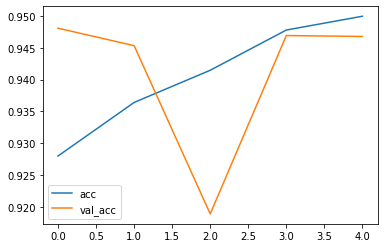

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

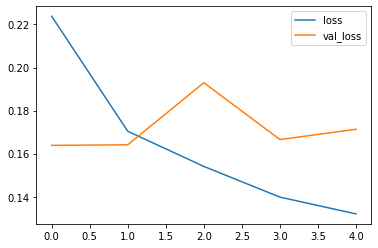

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")